In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image
from sixd import SixdToolkit

In [3]:
bench = SixdToolkit(dataset='hinterstoisser', unit=1e-3, num_kp=9, type_kp='random', is_train=True)

[LOG] Load SIXD from pkl file success


In [4]:
img = Image.open('/home/penggao/data/synthetic/hinterstoisser/9/random/images/00000.png')
annots = np.load('/home/penggao/data/synthetic/hinterstoisser/9/random/annots/00000.npy').item()
bboxes = annots['bboxes']
kps = annots['kps']
poses = annots['poses']
obj_ids = annots['obj_ids']

bboxes[:,2] -= bboxes[:,0]
bboxes[:,3] -= bboxes[:,1]

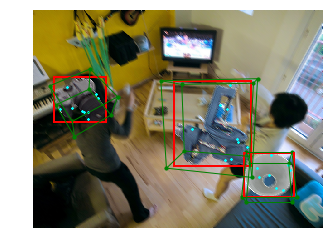

In [5]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
    
for IDX in range(bboxes.shape[0]):
    models = bench.models['%02d' % annots['obj_ids'][IDX]]
    corners = bench.get_3d_corners(models)

    corners = np.concatenate((corners, np.ones((corners.shape[0], 1))), axis=1)
    projected = np.matmul(np.matmul(bench.cam, poses[IDX]), corners.T)
    projected /= projected[2, :]
    projected = projected[:2, :].T

    edges_corners = (
        [0, 1], [0, 2], [0, 4], [1, 3], [1, 5], [2, 3],
        [2, 6], [3, 7], [4, 5], [4, 6], [5, 7], [6, 7]
    )
    ax.scatter(projected[:, 0], projected[:, 1], s=10, c='g')
    for edge in edges_corners:
        ax.plot(projected[edge, 0], projected[edge, 1], linewidth=1.0, c='g')

    bbox = bboxes[IDX]
    rect = mpatches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    kp = kps[IDX]
    ax.scatter(kp[:,0], kp[:,1], c='aqua', marker='x', s=3)

plt.savefig('demo.png', dpi=300, bbox_inches='tight', pad_inches=0)

## Frames

In [18]:
bench.frames['11'][471]['path']

'/home/penggao/data/sixd/hinterstoisser/train/11/rgb/0471.png'

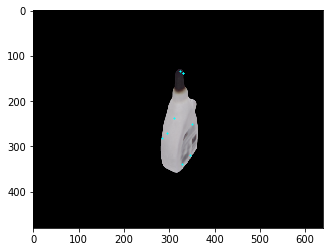

In [19]:
img = Image.open(bench.frames['11'][471]['path'])
kp = bench.frames['11'][471]['annots'][0]['kps']
bbox = bench.frames['11'][471]['annots'][0]['bbox']
fig, ax = plt.subplots()
plt.imshow(img)
ax.scatter(kp[:,0], kp[:,1], c='aqua', marker='x', s=1)
plt.show()

In [20]:
print(kp)
print(bbox)

[[284.550471   281.62723623]
 [349.64692445 251.36763417]
 [311.27095639 236.39792793]
 [294.85334363 269.6777646 ]
 [330.72697013 136.99145888]
 [345.7340071  318.34596972]
 [329.30886104 339.67180529]
 [330.72697013 136.99145888]
 [323.34763902 134.39296253]]
[282 130  83 228]


## Bounding boxes

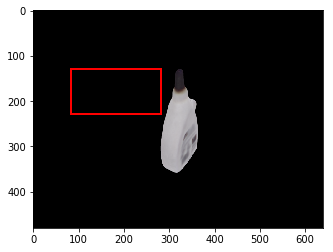

In [21]:
fig, ax = plt.subplots()
bbox[2] -= bbox[0]
bbox[3] -= bbox[1]
plt.imshow(img)
rect = mpatches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()